# Tutorial: Essential Probability

### Analytic and numerical manipulations of probability distributions

In this notebook we will work through some basic manipulations of probability distributions, e.g. marginalization and conditioning. We'll use a bivariate Gaussian distribution because so many manipulations one might do are analytic, which provides a cross-check.

By the end of the notebook, you should be able to:

* Compute marginal and conditional probabilities, both analytically and numerically 
* Use normalization as a check of your calculations

Here is some information about multivariate Gaussians, and in particular identities for conditional and marginal distributions: https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Joint_normality

Potentially useful definitions for univariate probability distributions:
* marginalization (continuous variables): $p(x) = \int p(x,y)\,dy$
* conditioning: $p(x|y) = p(x,y)/p(y)$

**Note:** Equations in markdown cells are coded in LaTeX, between $'s. Examine this cell in edit mode (double click it) to see. If you're not yet a LaTeX magician, don't worry; you'll probably see everything you need for the moment as we go. When in doubt, the appendices of [this guide](http://www.math.hkbu.edu.hk/TeX/essential.pdf) list many helpful math commands.

## 0. Setup

Import packages

In [2]:
TutorialName = 'essential_probability'
exec(open('tbc.py').read()) # define TBC and TBC_above
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Uncorrelated distributions

We start with a simple 2D _uncorrelated_ Gaussian probability distribution: $x$ and $y$ are independent. The function below defines this distribution (you can also find a 2D gaussian in `scipy.stats`, but for now we'll write our own). When $x$ and $y$ are uncorrelated, their joint 2D Gaussian distribution is nothing more that the product of a 1D Gaussian over $x$ and a 1D Gaussian over $y$.

In [12]:
# dict of parameter values: the means and standard deviations for x and y
unc = {'mx':1.0, 'my':2.3, 'sx':1.0, 'sy':0.5}

def unc_p_xy(x, y, mx, my, sx, sy):
    '''returns pdf of 2D uncorrelated gaussian distribution evaluated at (x,y)'''
    return np.exp(-0.5 * ( ((x-mx)/sx)**2 + ((y-my)/sy)**2 )) / (2*np.pi * sx * sy)

### 1a. Analytics: marginalizing and conditioning

Let's start with analytic manipulations. First write down the marginal probability distributions for $p(x)$ and $p(y)$.

Note: you will want to change the mode of the cell below, and in subsequent non-code responses, to Markdown to use LaTeX mode and/or insert images.

In [7]:
def p_x(x, mx,sx):
    '''returns pdf of gaussian distribution evaluated at (x)'''
    return np.exp(-0.5 * ( ((x-mx)/sx)**2 ) / (2*np.pi * sx))
def p_y(y, my,sy):
    '''returns pdf of gaussian distribution evaluated at (y)'''
    return np.exp(-0.5 * ( ((y-my)/sy)**2 ) / (2*np.pi * sy))

Now, using properties of conditional distributions, work out $p(x|y)$ and $p(y|x)$:

In [61]:
def p_x_y(x, y, mx, my, sx, sy):
    '''returns pdf of p(x|y) evaluated at (x,y)'''
    return unc_p_xy(x, y, mx, my, sx, sy)/p_y(y, my,sy)
def p_y_x(x, y, mx, my, sx, sy):
    '''returns pdf of p(y|x) evaluated at (x,y)'''
    return unc_p_yx(x, y, mx, my, sx, sy)/p_x(y, my,sy)

Now that you have the equations, code them up as functions in the cell below. Replace the TBC() calls with your solution, and delete the TBC_above() command outright. We will use these functions to compare our analytic and numerical results in later sections of this notebook.

**Aside:** If the `**kwargs` syntax below is unfamiliar, have a look [here](https://book.pythontips.com/en/latest/args_and_kwargs.html). In brief, in an argument list this is shorthand for any number of keyword arguments the user might pass. If we called `unc_p_x_given_y(1, 2, mx=3)` later on, then within the `unc_p_x_given_y` function scope we would have access to a dictionary called `kwargs` which would be `{'mx':3}`. We can (and will) also make calls like `unc_p_x(1, **unc)`; this is executed as if it were `unc_p_x(1, mx=1.0, my=2.3, sx=1.0, sy=0.5)` (see the definition of `unc` above). You're obviously **not required** to use this syntax in your own code, but it's convenient enough that you'll be seeing a lot of it in these notebooks. (Incidentally, the fact that we used `**kwargs` in some of the prototypes below is a pretty heavy hint, once you're fluent with the syntax.)

In [92]:
def unc_p_x(x, **unc):
    '''returns p(x) for uncorrelated Gaussian distribution'''
    return np.exp(-0.5*((x-unc['mx'])/unc['sx'])**2 ) / np.sqrt(2*np.pi*unc['sx'])

def unc_p_y(y, **unc):
    '''returns p(y) for uncorrelated Gaussian distribution'''
    return np.exp(-0.5*((y-unc['my'])/unc['sy'])**2 ) / np.sqrt(2*np.pi*unc['sy'])
def unc_p_x_given_y(x, y, **kwargs):
    '''returns p(x|y) for uncorrelated 2D Gaussian distribution'''
    return unc_p_xy(x, y, kwargs['mx'], kwargs['my'], 
                    kwargs['sx'], kwargs['sy'])/unc_p_y(y, kwargs['my'],kwargs['sy'])

def unc_p_y_given_x(y, x, **kwargs):
    '''returns p(y|x) for uncorrelated 2D Gaussian distribution'''
    return unc_p_yx(x, y, kwargs['mx'], kwargs['my'], 
                    kwargs['sx'], kwargs['sy'])/unc_p_x(x,  kwargs['mx'],kwargs['sx'])

### 1b. Numerics: probabilities on a grid

For our numerical caluations we will use a grid. This has been implemented for you in the next cell using the handy `np.meshgrid()` function. 

The grid resolution is deliberately chosen to be different with respect to to the distribution widths in $x$ and $y$. That way, if we even get confused about which index corresponds to $x$ and which to $y$, we just need to look at the shape of the grid. The bounds are chosen to contain most of $p(x,y)$. Of course, you can play with all of these things and see what changes (or doesn't) as a result!

In [93]:
# x bounds
xmin = -4.0
xmax = 6.0
dx = 0.1

# y bounds
ymin = -0.2
ymax = 4.8
dy = 0.1

# defind the x and y values and the meshgrid
xvalues = np.arange(xmin, xmax+dx, dx)
yvalues = np.arange(ymin, ymax+dy, dy)
grid_x, grid_y = np.meshgrid(xvalues, yvalues, indexing='ij')

Note the `indexing='ij'` option to `meshgrid`.
This makes it return arrays where the first index corresponds to $x$ and the second to $y$ instead of vice versa.
The result is a much better convention in terms of generalizing to higher dimensions (and it corresponds to our usual mathematical notation), but it means we will need to transpose arrays before plotting them if we want $x$ to appear on the horizontal axis and $y$ to appear on the vertical axis.

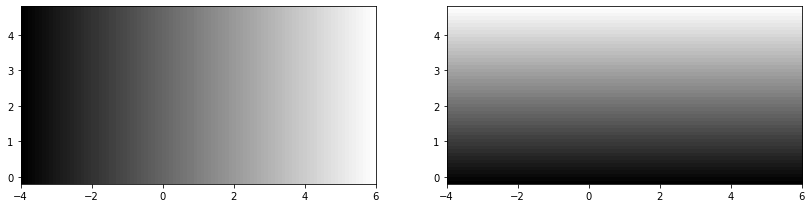

In [94]:
# plot the x and y grids as a sanity check
plt.rcParams['figure.figsize'] = (14.0, 5.0)
fig, ax = plt.subplots(1,2);
ax[0].imshow(grid_x.T, cmap='gray', origin='lower', extent=[xmin, xmax, ymin, ymax]);
ax[1].imshow(grid_y.T, cmap='gray', origin='lower', extent=[xmin, xmax, ymin, ymax]);

Let's evaluate $p(x,y)$ on this grid and visualize the probability distribution:

In [95]:
# evaluate p(x,y)
ugrid_p_xy = unc_p_xy(grid_x, grid_y, **unc)

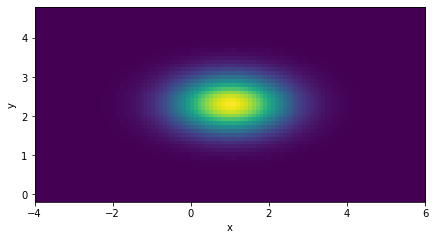

In [96]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.imshow(ugrid_p_xy.T, origin='lower', extent=[xmin, xmax, ymin, ymax]);
plt.xlabel('x');
plt.ylabel('y');

### 1c. Comparing analytic and numerical results of marginal distributions

#### First, $p(x)$
The above plot shows $p(x,y)$; we want to marginalize over $y$ to find $p(x)$. It may help to write the equation down before jumping straight into code. How would you do this marginalization on a discrete grid?

> $p(x)$ = 

In [47]:
ugrid_p_xy.shape

(101, 51)

In [97]:
# Marginalize over y. The result should be a 1D array, since it is still a function of x.
# As you might guess, the comment below indicates that the remaining notebook cells assume your answer is stored
# in a variable named ugrid_p_x.
ugrid_p_x=[]
for row in ugrid_p_xy:
    ugrid_p_x.append(sum(row)*dy)
ugrid_p_x=np.array(ugrid_p_x)

Let's have a look. The grid calculation above should match the analytic result very closely.

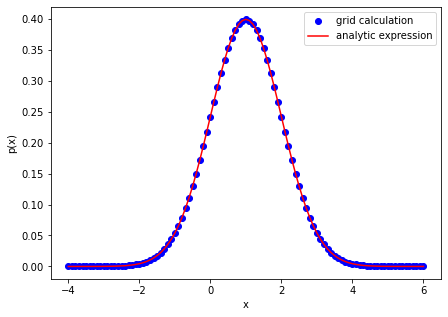

In [98]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(xvalues, ugrid_p_x, 'bo', label='grid calculation');
plt.plot(xvalues, unc_p_x(xvalues, **unc), 'r-', label='analytic expression');
plt.xlabel('x');
plt.ylabel('p(x)');
plt.legend();

One of the defining features of a probability distribution is that it integrates to 1. Verify by a quick calculation that our discrete approximation for $p(x)$, `ugrid_p_x` , is indeed normalized:

In [99]:
# verify that it's normalized (within reasonable numerical error)
print(sum(ugrid_p_x)*dx)

0.9999992382230243


#### Next, $p(y)$
We'll repeat the above steps to perform the marginalization over $x$ instead of $y$. Make sure to verify the distribution is properly normalized.

In [100]:
# marginalize p(x,y) over x and verify that it's normalized
ugrid_p_y=sum(ugrid_p_xy)*dx
print(sum(ugrid_p_y)*dy)

0.9999992382230243


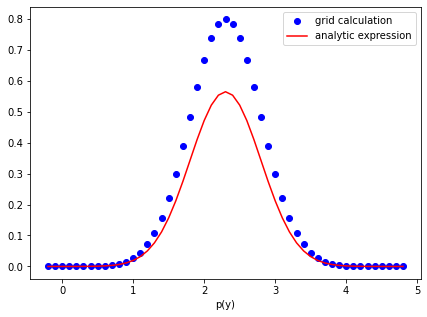

In [101]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(yvalues, ugrid_p_y, 'bo', label='grid calculation');
plt.plot(yvalues, unc_p_y(yvalues, **unc), 'r-', label='analytic expression');
plt.xlabel('y');
plt.xlabel('p(y)');
plt.legend();

### 1d. Comparing analytic and numerical results of conditional distributions

Now we would like to get a conditional distribution: given some value of $x$ (or $y$), what is the probability distribution for $y$ (or $x$)? In our example, this is most straightforward if we condition on a grid value. Otherwise, we would probably do some interpolation. Here we choose a couple particular values for fixing; feel free to play around with them.

In [102]:
xi = 30 # index into the grid of x's
fixed_x = xvalues[xi]
print(fixed_x)
yi = 40 # similarly for y
fixed_y = yvalues[yi]
print(fixed_y)

-0.9999999999999973
3.8


#### First, $p(x|y)$
Calculate the conditional probability $p(x|y=$ fixed_y$)$, and verify its normalization. 

In [107]:
ugrid_p_xy.shape
ugrid_p_x_given_y=[]
for row in ugrid_p_xy:
    ugrid_p_x_given_y.append(row[yi]/ugrid_p_y[yi])
print(sum(ugrid_p_x_given_y))
# p(x,y) = p(x|y) p(y)
# ugrid_p_x_given_y = ...

# verify that it's normalized
# print(...)


10.000000000000007


In [118]:
def unc_p_xy(x, y, mx, my, sx, sy):
    '''returns pdf of 2D uncorrelated gaussian distribution evaluated at (x,y)'''
    return np.exp(-0.5 * ( ((x-mx)/sx)**2 + ((y-my)/sy)**2 )) / (2*np.pi * sx * sy)
def unc_p_x(x, **unc):
    '''returns p(x) for uncorrelated Gaussian distribution'''
    return np.exp(-0.5*((x-unc['mx'])/unc['sx'])**2 ) / np.sqrt(2*np.pi*unc['sx'])
def unc_p_y(y, **unc):
    '''returns p(y) for uncorrelated Gaussian distribution'''
    return np.exp(-0.5*((y-unc['my'])/unc['sy'])**2 ) / np.sqrt(2*np.pi*unc['sy'])
def unc_p_x_given_y(x, y, **unc):
    '''returns p(x|y) for uncorrelated 2D Gaussian distribution'''
    return unc_p_xy(x, y, unc['mx'], unc['my'],unc['sx'], unc['sy'])/unc_p_y(y,**unc)
def unc_p_y_given_x(y, x, **unc):
    '''returns p(y|x) for uncorrelated 2D Gaussian distribution'''
    return unc_p_xy(x, y, unc['mx'], unc['my'],unc['sx'], unc['sy'])/unc_p_x(x,**unc)

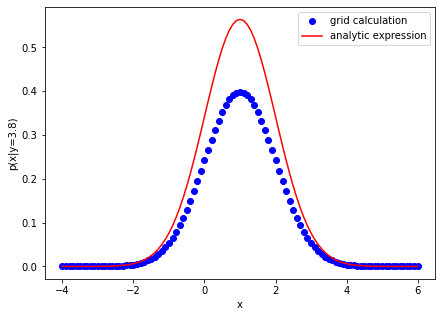

In [110]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(xvalues, ugrid_p_x_given_y, 'bo', label='grid calculation');
plt.plot(xvalues, unc_p_x_given_y(xvalues, fixed_y, **unc), 'r-', label='analytic expression');
plt.xlabel('x');
plt.ylabel('p(x|y=' + str(fixed_y) + ')');
plt.legend();

#### Next, $p(y|x)$
Now condition on $x=$ fixed_x instead.

In [121]:
# ugrid_p_y_given_x = ...
ugrid_p_y_given_x=ugrid_p_xy[xi]/ugrid_p_x[xi]
print(sum(ugrid_p_y_given_x))
# print(...)

10.0


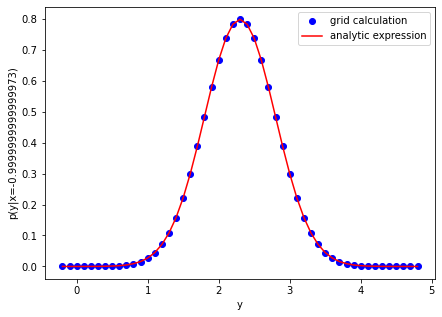

In [122]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.plot(yvalues, ugrid_p_y_given_x, 'bo', label='grid calculation');
plt.plot(yvalues, unc_p_y_given_x(yvalues, fixed_x, **unc), 'r-', label='analytic expression');
plt.xlabel('y');
plt.ylabel('p(y|x=' + str(fixed_x) + ')');
plt.legend();

## 2. Correlated distributions

Now that we've gotten the hang of some of these manipulations, we'll add a bit of complexity. For the second half of the notebook, we'll go through the same exercises as above, but we've removed our assumption of the independence of $x$ and $y$.

The new parameter below, $r$, is the _correlation coefficient_ of $x$ and $y$ (cf the [expression for a bivariate normal density on wikipedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Bivariate_case)).

In [173]:
cor = {'mx':1.0, 'my':2.3, 'sx':1.0, 'sy':0.5, 'r':-0.5} # parameter values

def cor_p_xy(x, y, mx, my, sx, sy, r):
    return np.exp(-0.5/(1.0-r**2)*( ((x-mx)/sx)**2 + ((y-my)/sy)**2 -2.0*r*(x-mx)/sx*(y-my)/sy )) / (2*np.pi*sx*sy*np.sqrt(1.0-r**2))

### 2a. analytics
As before, work out the analytic solutions first, including
* the marginal distributions, $p(x)$ and $p(y)$, and
* the conditional distributions, $p(x|y)$ and $p(y|x)$.

Then fill in the functions below.

In [190]:
# marginal
def cor_p_x(x, mx, my, sx, sy, r):
    return np.exp(-0.5/(1.0-r**2)* ((x-mx)/sx)**2 ) / (np.sqrt(2*np.pi)*sx)
def cor_p_y(y, mx, my, sx, sy, r):
    return np.exp(-0.5/(1.0-r**2)* ((y-my)/sy)**2 ) / (np.sqrt(2*np.pi)*sy)

# conditional distributions
def cor_p_x_given_y(x, y, mx, my, sx, sy, r):
    return cor_p_xy(x, y, mx, my, sx, sy, r)/cor_p_y(y, mx, my, sx, sy, r)
    
def cor_p_y_given_x(y, x, mx, my, sx, sy, r):
    return cor_p_xy(x, y, mx, my, sx, sy, r)/cor_p_x(x, mx, my, sx, sy, r)

### 2b. numerics
We'll use the same grid definition as in 1b.

In [191]:
cgrid_p_xy = cor_p_xy(grid_x, grid_y, **cor)

Visualize the correlated pdf:

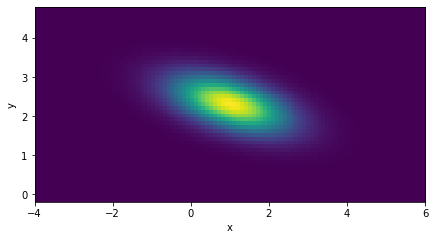

In [192]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.imshow(cgrid_p_xy.T, origin='lower', extent=[xmin, xmax, ymin, ymax]);
plt.xlabel('x');
plt.ylabel('y');

### 2c. Marginal distributions

#### First, $p(x)$
Marginalize over $y$ (remember to check the normalization)

In [193]:
cgrid_p_x=[]
for row in cgrid_p_xy:
    cgrid_p_x.append(sum(row)*dy)
print(sum(cgrid_p_x))

9.999992391695523


Here we'll compare the marginal $p(x)$ of the correlated and uncorrelated distributions $p(x,y)$. Do the similarities or differences make sense?

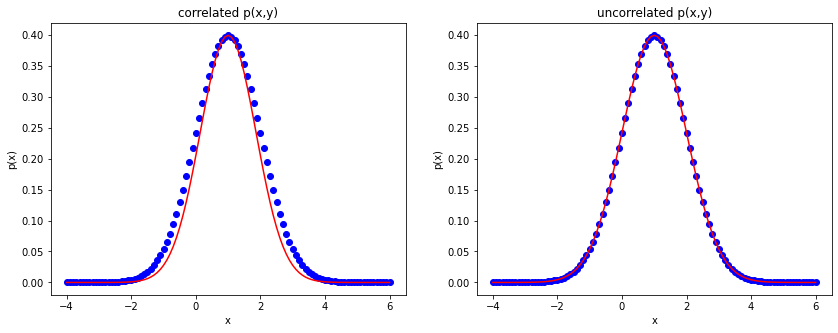

In [194]:
plt.rcParams['figure.figsize'] = (14.0, 5.0)
fig, ax = plt.subplots(1,2);
ax[0].plot(xvalues, cgrid_p_x, 'bo');
ax[0].plot(xvalues, cor_p_x(xvalues, **cor), 'r-');
ax[0].set_xlabel('x');
ax[0].set_ylabel('p(x)');
ax[0].set_title('correlated p(x,y)');
ax[1].plot(xvalues, ugrid_p_x, 'bo');
ax[1].plot(xvalues, unc_p_x(xvalues, **unc), 'r-');
ax[1].set_xlabel('x');
ax[1].set_ylabel('p(x)');
ax[1].set_title('uncorrelated p(x,y)');

#### Next, $p(y)$
Marginalize over $x$ (remember to check the normalization)

In [195]:
cgrid_p_y = sum(cgrid_p_xy)*dx
print(sum(cgrid_p_y))


9.99999239169552


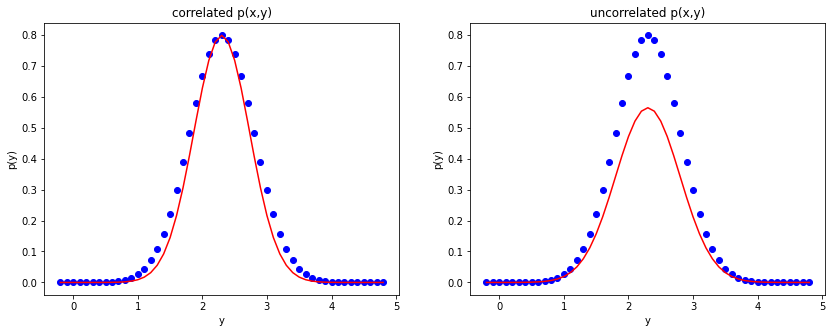

In [196]:
plt.rcParams['figure.figsize'] = (14.0, 5.0)
fig, ax = plt.subplots(1,2);
ax[0].plot(yvalues, cgrid_p_y, 'bo');
ax[0].plot(yvalues, cor_p_y(yvalues, **cor), 'r-');
ax[0].set_xlabel('y');
ax[0].set_ylabel('p(y)');
ax[0].set_title('correlated p(x,y)');
ax[1].plot(yvalues, ugrid_p_y, 'bo');
ax[1].plot(yvalues, unc_p_y(yvalues, **unc), 'r-');
ax[1].set_xlabel('y');
ax[1].set_ylabel('p(y)');
ax[1].set_title('uncorrelated p(x,y)');

### 2d. Conditional distributions

#### First, $p(x|y)$
As before, condition on $y=$ fixed_y:

In [197]:
cgrid_p_x_given_y = []
for row in cgrid_p_xy:
    cgrid_p_x_given_y.append(row[yi]/cgrid_p_y[yi])
print(sum(cgrid_p_x_given_y))

10.000000000000007


Once again we'll compare this calculation with what we got for the uncorrelated case. Do the similarities or differences make sense?

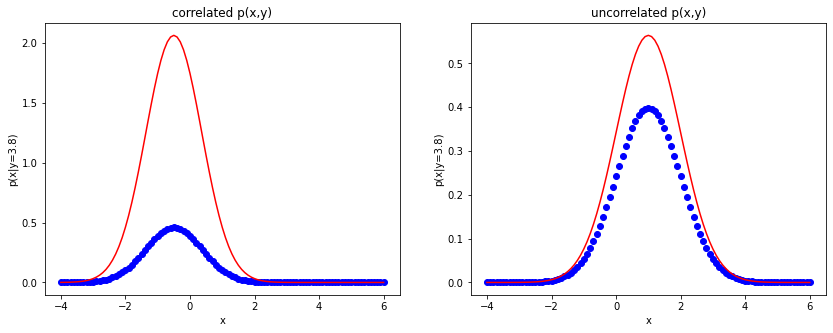

In [198]:
plt.rcParams['figure.figsize'] = (14.0, 5.0)
fig, ax = plt.subplots(1,2);
ax[0].plot(xvalues, cgrid_p_x_given_y, 'bo');
ax[0].plot(xvalues, cor_p_x_given_y(xvalues, fixed_y, **cor), 'r-');
ax[0].set_xlabel('x');
ax[0].set_ylabel('p(x|y=' + str(fixed_y) + ')');
ax[0].set_title('correlated p(x,y)');
ax[1].plot(xvalues, ugrid_p_x_given_y, 'bo');
ax[1].plot(xvalues, unc_p_x_given_y(xvalues, fixed_y, **unc), 'r-');
ax[1].set_xlabel('x');
ax[1].set_ylabel('p(x|y=' + str(fixed_y) + ')');
ax[1].set_title('uncorrelated p(x,y)');

#### Next, $p(y|x)$
Condition on $x=$ fixed_x:

In [199]:
cgrid_p_y_given_x = cgrid_p_xy[xi]/cgrid_p_x[xi]
print(sum(cgrid_p_y_given_x))

10.000000000000002


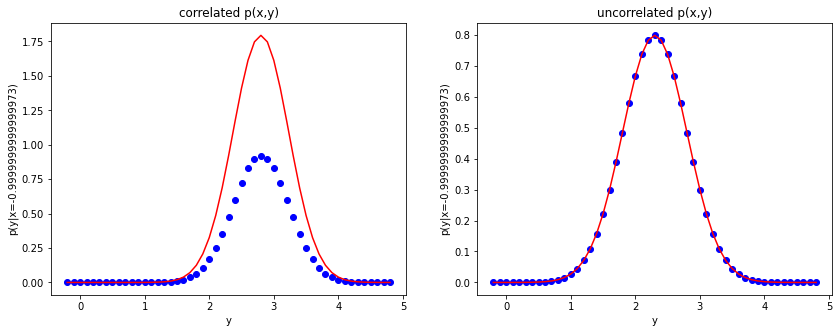

In [200]:
plt.rcParams['figure.figsize'] = (14.0, 5.0)
fig, ax = plt.subplots(1,2);
ax[0].plot(yvalues, cgrid_p_y_given_x, 'bo');
ax[0].plot(yvalues, cor_p_y_given_x(yvalues, fixed_x, **cor), 'r-');
ax[0].set_xlabel('y');
ax[0].set_ylabel('p(y|x=' + str(fixed_x) + ')');
ax[0].set_title('correlated p(x,y)');
ax[1].plot(yvalues, ugrid_p_y_given_x, 'bo');
ax[1].plot(yvalues, unc_p_y_given_x(yvalues, fixed_x, **unc), 'r-');
ax[1].set_xlabel('y');
ax[1].set_ylabel('p(y|x=' + str(fixed_x) + ')');
ax[1].set_title('uncorrelated p(x,y)');

You reached the end! We'll be making frequent use of these basic probability manipulations, not to mention many of the python operations above, as we go on.